In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [ ]:
train_data, test_data = imdb['train'],imdb['test']
# test_data = imdb_data['test']

train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

for s,l in train_data:
  train_sentences.append(s.numpy().decode('utf8'))
  train_labels.append(l.numpy())

for s,l in test_data:
  test_sentences.append(s.numpy().decode('utf8'))
  test_labels.append(l.numpy())   

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)  

In [ ]:
vocab_size = 10000
oov_token = '<OOV>'
max_length = 120
trunc_type='post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)

train_padded = pad_sequences(train_sequences, truncating=trunc_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)

test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


In [ ]:
embedding_dim=16
dense_dim=6

model_flatten = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(dense_dim, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')                          
])

model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_flatten.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 6)                 11526     
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS=10
BATCH_SIZE=128

history_flatten = model_flatten.fit(train_padded, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_padded, test_labels))

Epoch 1/10
196/196 [==============================] - 3s 11ms/step - loss: 0.5959 - accuracy: 0.6683 - val_loss: 0.3926 - val_accuracy: 0.8311
Epoch 2/10
196/196 [==============================] - 2s 10ms/step - loss: 0.3095 - accuracy: 0.8742 - val_loss: 0.3437 - val_accuracy: 0.8482
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.1856 - accuracy: 0.9373 - val_loss: 0.3663 - val_accuracy: 0.8411
Epoch 4/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0922 - accuracy: 0.9800 - val_loss: 0.3983 - val_accuracy: 0.8381
Epoch 5/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0390 - accuracy: 0.9964 - val_loss: 0.4421 - val_accuracy: 0.8350
Epoch 6/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0179 - accuracy: 0.9990 - val_loss: 0.4807 - val_accuracy: 0.8335
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0096 - accuracy: 0.9996 - val_loss: 0.5131 - val_accuracy: 0.8328
E

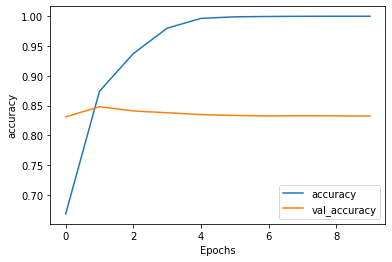

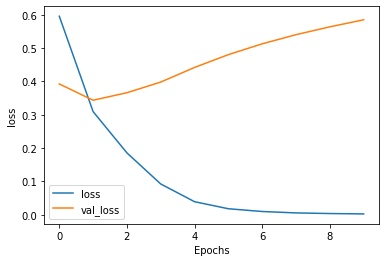

In [ ]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [ ]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

model_lstm = tf.keras.models.Sequential([
                  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
                  tf.keras.layers.Dense(dense_dim),
                  tf.keras.layers.Dense(1)                       
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(train_padded, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_padded, test_labels))

Epoch 1/10
196/196 [==============================] - 40s 185ms/step - loss: 0.7468 - accuracy: 0.5948 - val_loss: 0.6128 - val_accuracy: 0.7022
Epoch 2/10
196/196 [==============================] - 35s 178ms/step - loss: 0.5595 - accuracy: 0.7498 - val_loss: 0.4835 - val_accuracy: 0.7826
Epoch 3/10
196/196 [==============================] - 35s 177ms/step - loss: 0.4386 - accuracy: 0.8256 - val_loss: 0.5123 - val_accuracy: 0.8145
Epoch 4/10
196/196 [==============================] - 35s 177ms/step - loss: 0.3853 - accuracy: 0.8598 - val_loss: 0.5565 - val_accuracy: 0.7275
Epoch 5/10
196/196 [==============================] - 35s 177ms/step - loss: 0.3691 - accuracy: 0.8614 - val_loss: 0.6320 - val_accuracy: 0.8227
Epoch 6/10
196/196 [==============================] - 35s 178ms/step - loss: 0.4410 - accuracy: 0.8496 - val_loss: 0.5718 - val_accuracy: 0.7014
Epoch 7/10
196/196 [==============================] - 35s 180ms/step - loss: 0.3765 - accuracy: 0.8476 - val_loss: 0.6368 - val_ac